In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]


[1]


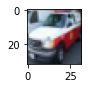

In [4]:
inx = 60
plt.figure(figsize=(1, 1))
plt.imshow(x_train[inx,:,:,:])
print(y_train[inx])

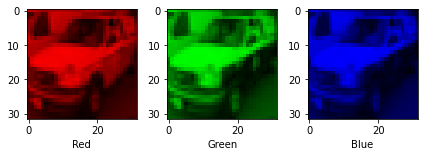

In [5]:
dim = np.zeros((32, 32))

plt.subplot(1, 3, 1)
plt.imshow(np.stack((x_train[inx,:,:,0]/255, dim, dim), axis=2))
plt.xlabel("Red")
plt.subplot(1, 3, 2)
plt.imshow(np.stack((dim, x_train[inx,:,:,1]/255, dim), axis=2))
plt.xlabel("Green")
plt.subplot(1, 3, 3)
plt.imshow(np.stack((dim, dim, x_train[inx,:,:,2]/255), axis=2))
plt.xlabel("Blue")
plt.tight_layout()

In [5]:
import tensorflow as tf
from keras import layers, models, utils
from keras.models import Sequential

x_train = np.reshape(x_train, (-1, 32*32*3))
x_test = np.reshape(x_test, (-1, 32*32*3))

In [6]:
x_train.shape

(50000, 3072)

In [7]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train)
# When an unknown category is encountered during
# transform, the resulting one-hot encoded columns
# for this feature will be all zeros.

categories = enc.categories_[0]
print(categories)

y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot = enc.transform(y_test).toarray()

[0 1 2 3 4 5 6 7 8 9]


In [47]:
keras.backend.clear_session()
model = Sequential()
model.add(keras.Input(shape=(32*32*3, )))

In [48]:
n_hidden_layers = 8

for i in range(n_hidden_layers):
    model.add(layers.Dense(200, activation='relu'))
    #tf.keras.layers.BatchNormalization()
# model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))
# The elements of the output vector are in range (0, 1) and sum to 1.

from keras import optimizers

opt = optimizers.Adam(0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 200)               4

In [49]:
train_hist = model.fit(x_train, y_train_onehot, batch_size=100,
        epochs=35,verbose=1, validation_data=(x_test, y_test_onehot), shuffle=True)
# final decision is the 8 layers, no drop, batch size 128, learning rate is the 0.0001, 288 per layer
# add tf.keras.layers.BatchNormalization()

Epoch 1/35
500/500 [==============================] - 7s 12ms/step - loss: 2.2078 - accuracy: 0.2672 - val_loss: 1.8592 - val_accuracy: 0.3289
Epoch 2/35
500/500 [==============================] - 6s 11ms/step - loss: 1.8036 - accuracy: 0.3515 - val_loss: 1.7547 - val_accuracy: 0.3644
Epoch 3/35
500/500 [==============================] - 6s 13ms/step - loss: 1.7173 - accuracy: 0.3855 - val_loss: 1.6649 - val_accuracy: 0.4016
Epoch 4/35
500/500 [==============================] - 6s 12ms/step - loss: 1.6479 - accuracy: 0.4117 - val_loss: 1.6410 - val_accuracy: 0.4146
Epoch 5/35
500/500 [==============================] - 6s 12ms/step - loss: 1.5997 - accuracy: 0.4281 - val_loss: 1.5869 - val_accuracy: 0.4389
Epoch 6/35
500/500 [==============================] - 7s 13ms/step - loss: 1.5602 - accuracy: 0.4432 - val_loss: 1.5892 - val_accuracy: 0.4323
Epoch 7/35
500/500 [==============================] - 8s 15ms/step - loss: 1.5264 - accuracy: 0.4538 - val_loss: 1.6167 - val_accuracy: 0.4178

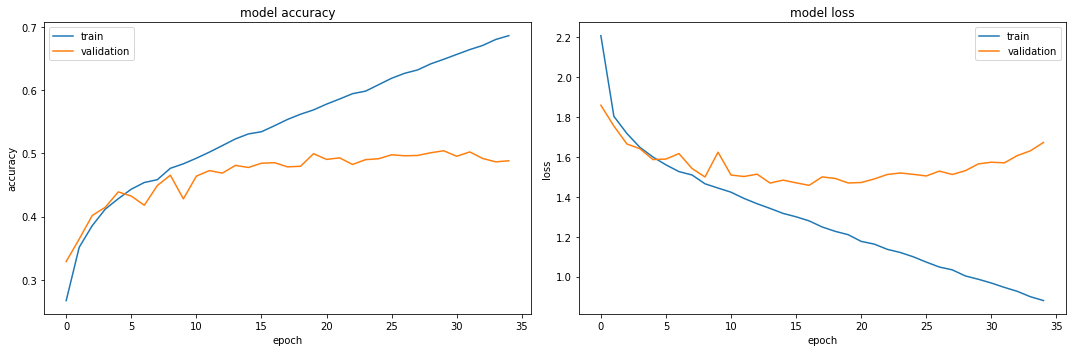

In [50]:

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(train_hist.history['accuracy'])
axs[0].plot(train_hist.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'])

axs[1].plot(train_hist.history['loss'])
axs[1].plot(train_hist.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'])

plt.tight_layout()
plt.show()

In [95]:
loss, acc = model.evaluate(x_test, y_test_onehot, verbose=1)

print("Model's accuracy: {:5.2f}%".format(100*acc))

313/313 [==============================] - 1s 2ms/step - loss: 1.4982 - accuracy: 0.4719
Model's accuracy: 47.19%


In [56]:
alltest = {}
for bs in [0, 0.2]:
    keras.backend.clear_session()
    model = Sequential()
    model.add(keras.Input(shape=(32*32*3, )))
    n_hidden_layers = 8
    for i in range(n_hidden_layers):
        model.add(layers.Dense(288, activation='relu'))
        #tf.keras.layers.BatchNormalization()
    model.add(layers.Dropout(bs))
    model.add(layers.Dense(10, activation='softmax'))

    from keras import optimizers

    opt = keras.optimizers.Adam(0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    #model.summary()

    train_hist = model.fit(x_train, y_train_onehot, batch_size=128,
    epochs=25,verbose=1, validation_data=(x_test, y_test_onehot), shuffle=True)
    alltest['bs_%f' % (bs)] = train_hist.history

Epoch 1/25
391/391 [==============================] - 10s 23ms/step - loss: 2.3031 - accuracy: 0.2737 - val_loss: 1.8663 - val_accuracy: 0.3396
Epoch 2/25
391/391 [==============================] - 10s 26ms/step - loss: 1.7987 - accuracy: 0.3568 - val_loss: 1.7592 - val_accuracy: 0.3762
Epoch 3/25
391/391 [==============================] - 9s 24ms/step - loss: 1.6919 - accuracy: 0.3949 - val_loss: 1.7402 - val_accuracy: 0.3861
Epoch 4/25
391/391 [==============================] - 9s 24ms/step - loss: 1.6325 - accuracy: 0.4162 - val_loss: 1.6405 - val_accuracy: 0.4119
Epoch 5/25
391/391 [==============================] - 9s 23ms/step - loss: 1.5813 - accuracy: 0.4359 - val_loss: 1.6254 - val_accuracy: 0.4168
Epoch 6/25
391/391 [==============================] - 10s 25ms/step - loss: 1.5497 - accuracy: 0.4489 - val_loss: 1.5984 - val_accuracy: 0.4265
Epoch 7/25
391/391 [==============================] - 9s 24ms/step - loss: 1.5062 - accuracy: 0.4620 - val_loss: 1.5744 - val_accuracy: 0.4

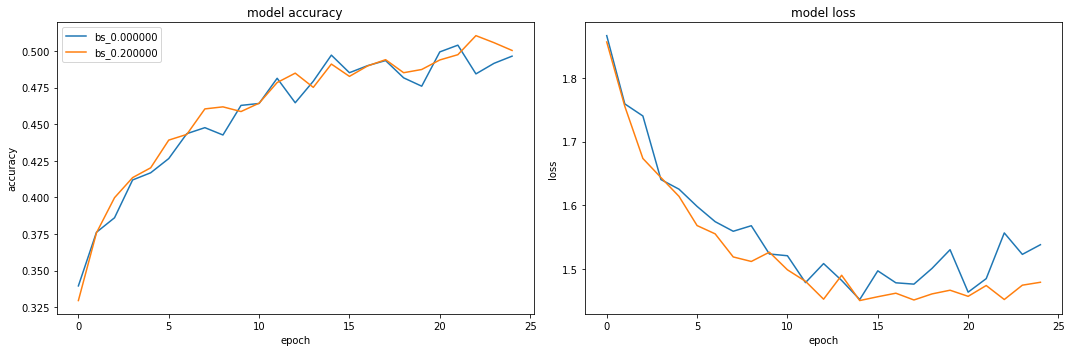

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for conf in alltest:
    axs[0].plot(alltest[conf]['val_accuracy'], label=conf)
    axs[0].set_title('model accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend()

    axs[1].plot(alltest[conf]['val_loss'])
    axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')

plt.tight_layout()
plt.show()